In [ ]:
import torch
from lcmr_ext.loss import CLIPLoss, CombinedLoss, ImageMaeLoss, ImageMseLoss, LPIPSLoss
from lcmr_ext.renderer.renderer2d import PyTorch3DRenderer2D
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

from lcmr.dataset import DatasetOptions, RandomDataset
from lcmr.encoder import ResNet18Encoder
from lcmr.modeler import DummyModeler
from lcmr.reconstruction_model import ReconstructionModel
from lcmr.utils.colors import colors
from lcmr.utils.presentation import display_img, make_img_grid

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
raster_size = (128, 128)

options = DatasetOptions(
    raster_size=raster_size, n_objects=1, n_samples=1024, return_scenes=False, use_single_scale=False, background_color=colors.black, n_jobs=2, renderer_device=device
)
dataset = RandomDataset(options)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True, drop_last=True, collate_fn=RandomDataset.collate_fn)

2025-02-14 17:49:31.782668: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
encoder = ResNet18Encoder().to(device)
renderer = PyTorch3DRenderer2D(raster_size, background_color=colors.black, device=device, n_verts=32, faces_per_pixel=4)
renderer = PyTorch3DRenderer2D(raster_size, background_color=colors.black, device=device, n_verts=32, faces_per_pixel=4)
modeler = DummyModeler(encoder_feature_dim=512, hidden_dim=128).to(device)
#loss_fn = CombinedLoss((0.1, LPIPSLoss().to(device)), (1, ImageMaeLoss())).to(device)
#loss_fn = CombinedLoss((0.5, ImageMaeLoss()), (0.1, LPIPSLoss().to(device)), (1, CLIPLoss())).to(device)

loss_fn = ImageMaeLoss().to(device)


model = ReconstructionModel(encoder, modeler, renderer)

loss: ImageMaeLoss: 0.0728:   5%|▌         | 1/20 [00:07<02:26,  7.70s/it]

epoch: 0, loss: ImageMaeLoss: 0.0728


loss: ImageMaeLoss: 0.0531:  10%|█         | 2/20 [00:09<01:18,  4.39s/it]

epoch: 1, loss: ImageMaeLoss: 0.0531


loss: ImageMaeLoss: 0.0534:  10%|█         | 2/20 [00:12<01:18,  4.39s/it]

epoch: 2, loss: ImageMaeLoss: 0.0534


loss: ImageMaeLoss: 0.0523:  20%|██        | 4/20 [00:19<01:10,  4.43s/it]

epoch: 3, loss: ImageMaeLoss: 0.0523


loss: ImageMaeLoss: 0.0541:  20%|██        | 4/20 [00:21<01:10,  4.43s/it]

epoch: 4, loss: ImageMaeLoss: 0.0541


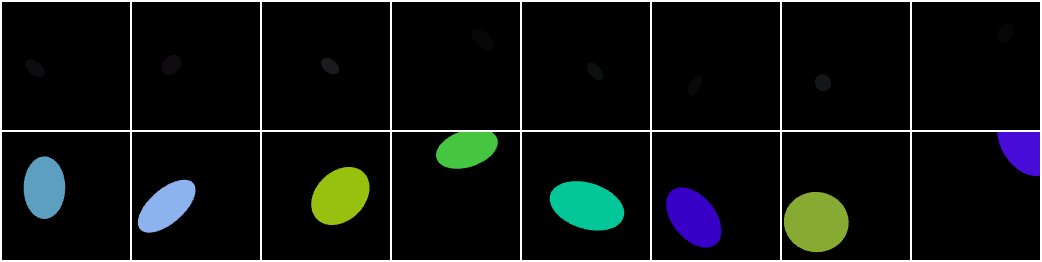

loss: ImageMaeLoss: 0.0523:  25%|██▌       | 5/20 [00:29<01:21,  5.42s/it]

epoch: 5, loss: ImageMaeLoss: 0.0523


loss: ImageMaeLoss: 0.0464:  30%|███       | 6/20 [00:32<01:04,  4.63s/it]

epoch: 6, loss: ImageMaeLoss: 0.0464


loss: ImageMaeLoss: 0.0420:  35%|███▌      | 7/20 [00:38<01:07,  5.20s/it]

epoch: 7, loss: ImageMaeLoss: 0.0420


loss: ImageMaeLoss: 0.0405:  40%|████      | 8/20 [00:43<00:59,  4.95s/it]

epoch: 8, loss: ImageMaeLoss: 0.0405


loss: ImageMaeLoss: 0.0354:  45%|████▌     | 9/20 [00:48<00:55,  5.02s/it]

epoch: 9, loss: ImageMaeLoss: 0.0354


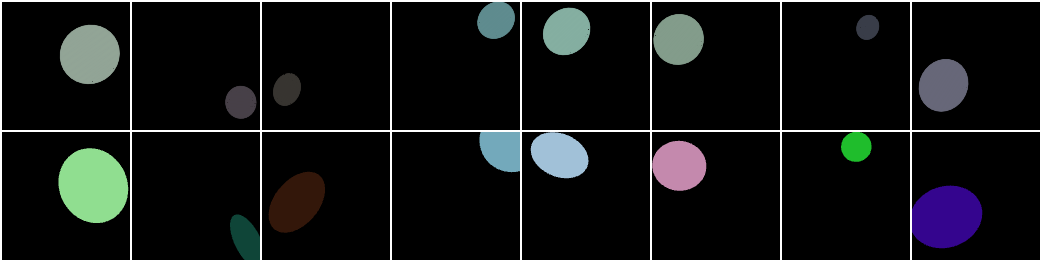

loss: ImageMaeLoss: 0.0347:  50%|█████     | 10/20 [00:53<00:51,  5.11s/it]

epoch: 10, loss: ImageMaeLoss: 0.0347


loss: ImageMaeLoss: 0.0318:  55%|█████▌    | 11/20 [00:59<00:45,  5.03s/it]

epoch: 11, loss: ImageMaeLoss: 0.0318


loss: ImageMaeLoss: 0.0300:  60%|██████    | 12/20 [01:03<00:38,  4.86s/it]

epoch: 12, loss: ImageMaeLoss: 0.0300


loss: ImageMaeLoss: 0.0271:  65%|██████▌   | 13/20 [01:08<00:34,  4.98s/it]

epoch: 13, loss: ImageMaeLoss: 0.0271


loss: ImageMaeLoss: 0.0261:  70%|███████   | 14/20 [01:13<00:29,  4.99s/it]

epoch: 14, loss: ImageMaeLoss: 0.0261


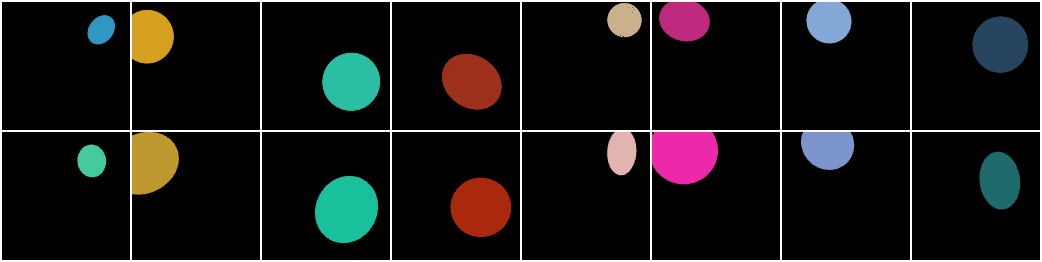

loss: ImageMaeLoss: 0.0253:  75%|███████▌  | 15/20 [01:18<00:24,  5.00s/it]

epoch: 15, loss: ImageMaeLoss: 0.0253


loss: ImageMaeLoss: 0.0245:  80%|████████  | 16/20 [01:24<00:20,  5.18s/it]

epoch: 16, loss: ImageMaeLoss: 0.0245


loss: ImageMaeLoss: 0.0238:  85%|████████▌ | 17/20 [01:28<00:14,  4.91s/it]

epoch: 17, loss: ImageMaeLoss: 0.0238


loss: ImageMaeLoss: 0.0234:  95%|█████████▌| 19/20 [01:34<00:04,  4.71s/it]

epoch: 18, loss: ImageMaeLoss: 0.0234


loss: ImageMaeLoss: 0.0233:  95%|█████████▌| 19/20 [01:37<00:04,  4.71s/it]

epoch: 19, loss: ImageMaeLoss: 0.0233


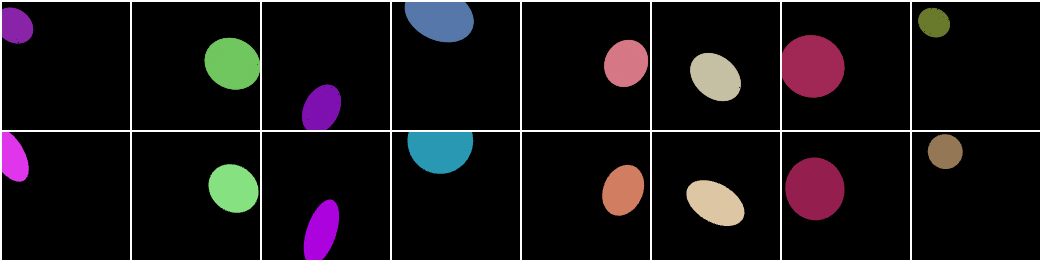

loss: ImageMaeLoss: 0.0233: 100%|██████████| 20/20 [01:41<00:00,  5.05s/it]


In [3]:
logdir = "./runs/experiment_1"
#writer = SummaryWriter(logdir)

epochs = 20
show_step = 5
lr = 0.001

optimizer = torch.optim.AdamW(list(modeler.parameters()), lr=lr)

batch_len = dataloader.batch_size

for epoch in (bar := tqdm(range(epochs))):
    loss_fn.reset()
    model.train()
    for j, target in enumerate(dataloader):
        optimizer.zero_grad()

        target = target.to(device)

        pred = model(target.image)

        loss = loss_fn(pred, target)

        loss.backward()
        optimizer.step()

        bar.set_description(f"loss: {loss_fn}")

    print(f"epoch: {epoch}, loss: {loss_fn}")
    #writer.add_scalar("training loss", mean_loss, epoch)

    if (epoch + 1) % show_step == 0:
        with torch.no_grad():
            img_grid = make_img_grid((pred.image_rgb_top, target.image_rgb_top))
            #writer.add_image("visualization", img_grid.permute(2, 0, 1), epoch)
            display_img(img_grid)

    dataset.regenerate()

# torch.save(modeler, f"{logdir}/model.pt")
# writer.close()